## Model Building and Training

In [1]:
#import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')


In [2]:
# load dataset

df = pd.read_csv("C:\Summer Training\Projects\Final Project\Data\cleaned_creditcard.csv")
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.774718,-0.995290,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.268530,-0.995290,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.959811,-0.995279,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.411487,-0.995279,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.667362,-0.995267,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [3]:
#data spliting

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize empty list to collect all results
results = []


### Logistic Regression

Logistic Regression Results
Accuracy: 0.9991, F1: 0.6875, ROC-AUC: 0.9560


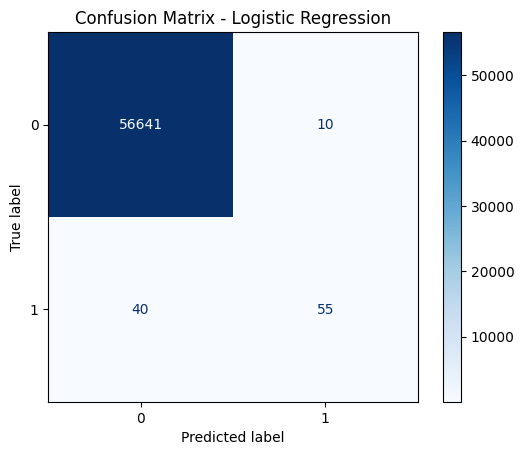

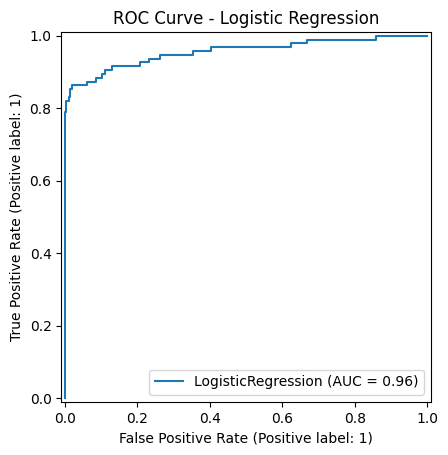

In [4]:
# Define and train
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test_scaled)
y_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate
acc_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)

print("Logistic Regression Results")
print(f"Accuracy: {acc_lr:.4f}, F1: {f1_lr:.4f}, ROC-AUC: {roc_auc_lr:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(lr_model, X_test_scaled, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()

# Store result
results.append({
    'Model_Name': 'Logistic Regression',
    'Accuracy': round(acc_lr, 4),
    'F1_Score': round(f1_lr, 4),
    'ROC_AUC': round(roc_auc_lr, 4)
})


### Random Forest Classifier

Random Forest Results
Accuracy: 0.9995, F1: 0.8383, ROC-AUC: 0.9347


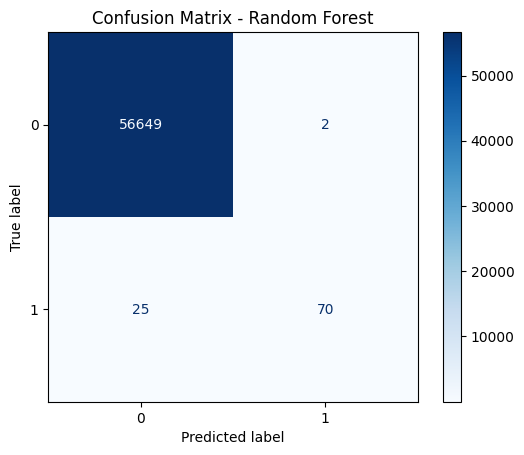

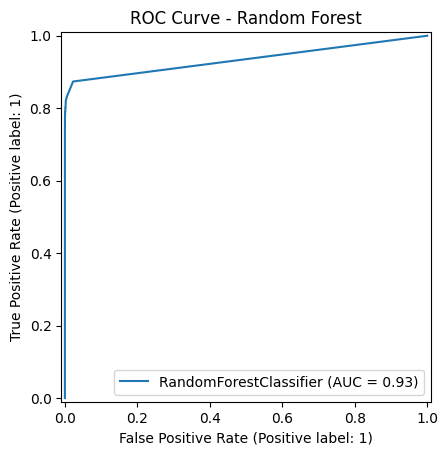

In [5]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)
y_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)

print("Random Forest Results")
print(f"Accuracy: {acc_rf:.4f}, F1: {f1_rf:.4f}, ROC-AUC: {roc_auc_rf:.4f}")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=[0, 1], cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

RocCurveDisplay.from_estimator(rf_model, X_test_scaled, y_test)
plt.title("ROC Curve - Random Forest")
plt.show()

results.append({
    'Model_Name': 'Random Forest',
    'Accuracy': round(acc_rf, 4),
    'F1_Score': round(f1_rf, 4),
    'ROC_AUC': round(roc_auc_rf, 4)
})


### AdaBoost Classifier

AdaBoost Results
Accuracy: 0.9990, F1: 0.6932, ROC-AUC: 0.9704


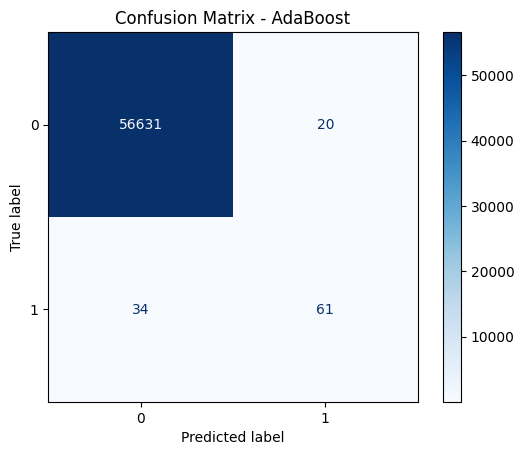

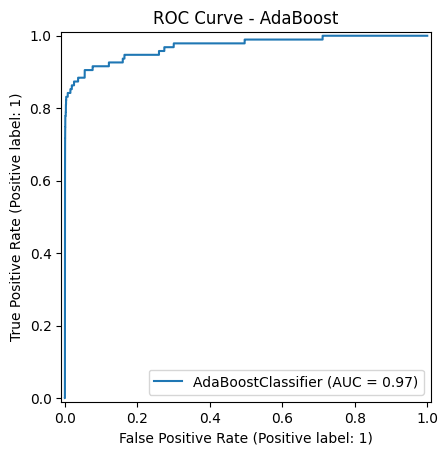

In [6]:
ada_model = AdaBoostClassifier(n_estimators=100)
ada_model.fit(X_train_scaled, y_train)

y_pred_ada = ada_model.predict(X_test_scaled)
y_proba_ada = ada_model.predict_proba(X_test_scaled)[:, 1]

acc_ada = accuracy_score(y_test, y_pred_ada)
f1_ada = f1_score(y_test, y_pred_ada)
roc_auc_ada = roc_auc_score(y_test, y_proba_ada)

print("AdaBoost Results")
print(f"Accuracy: {acc_ada:.4f}, F1: {f1_ada:.4f}, ROC-AUC: {roc_auc_ada:.4f}")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ada, display_labels=[0, 1], cmap='Blues')
plt.title("Confusion Matrix - AdaBoost")
plt.show()

RocCurveDisplay.from_estimator(ada_model, X_test_scaled, y_test)
plt.title("ROC Curve - AdaBoost")
plt.show()

results.append({
    'Model_Name': 'AdaBoost',
    'Accuracy': round(acc_ada, 4),
    'F1_Score': round(f1_ada, 4),
    'ROC_AUC': round(roc_auc_ada, 4)
})


### XGBoost Classifier

XGBoost Results
Accuracy: 0.9993, F1: 0.7667, ROC-AUC: 0.9340


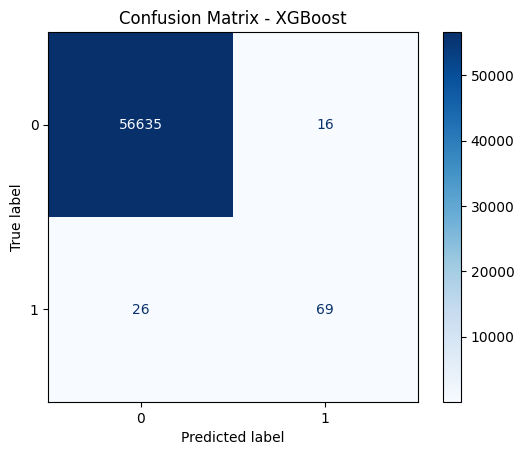

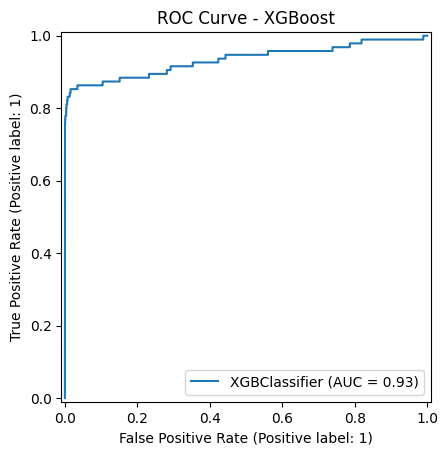

In [7]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)
y_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

acc_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)

print("XGBoost Results")
print(f"Accuracy: {acc_xgb:.4f}, F1: {f1_xgb:.4f}, ROC-AUC: {roc_auc_xgb:.4f}")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, display_labels=[0, 1], cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.show()

RocCurveDisplay.from_estimator(xgb_model, X_test_scaled, y_test)
plt.title("ROC Curve - XGBoost")
plt.show()

results.append({
    'Model_Name': 'XGBoost',
    'Accuracy': round(acc_xgb, 4),
    'F1_Score': round(f1_xgb, 4),
    'ROC_AUC': round(roc_auc_xgb, 4)
})


In [8]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
print("Final Model Comparison:")
display(results_df)


Final Model Comparison:


,Model_Name,Accuracy,F1_Score,ROC_AUC
0,Random Forest,0.9995,0.8383,0.9347
1,XGBoost,0.9993,0.7667,0.9340
2,Logistic Regression,0.9991,0.6875,0.9560
3,AdaBoost,0.9990,0.6932,0.9704


In [11]:
best_model = results_df.loc[0]
print(f"\nBest Model: {best_model['Model_Name']}")
print(f"Accuracy: {best_model['Accuracy']:.4f}")
print(f"F1 Score: {best_model['F1_Score']:.4f}")
print(f"ROC-AUC: {best_model['ROC_AUC']:.4f}")



Best Model: Random Forest
Accuracy: 0.9995
F1 Score: 0.8383
ROC-AUC: 0.9347
